# House price 

### House price depends on multiple factors. Some are the essential factors we look into like cost of the house, area of the house, floors. But we also compare the luxuries that comes in for the same amount of money in the other house like AC, Heater, backyard etc 

In [20]:
#importing important libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
pip install missingno

## Importing and Exploring Data set

In [22]:
#The data set is taken from
df = pd.read_csv("kc_house_data.csv")

In [23]:
#checking the dataset
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
len(df.columns)

21

In [28]:
df.sum()

id                                                  98994056770455
date             20141013T00000020141209T00000020150225T0000002...
price                                                  1.16729e+10
bedrooms                                                     72854
bathrooms                                                  45706.2
sqft_living                                               44952873
sqft_lot                                                 326506890
floors                                                     32296.5
waterfront                                                     163
view                                                          5064
condition                                                    73688
grade                                                       165488
sqft_above                                              3.8649e+07
sqft_basement                                              6300385
yr_built                                                  4259

In [29]:
#I have dropped the 'id' and 'date' columns which I felt was unnessary for my analysis
df=df.drop(['id'], axis=1)
df=df.drop(['date'], axis=1)

In [30]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
#Dataset after dropping few columns
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
len(df.columns)

19

In [33]:
#checking for null values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
df['sqft_above']=df['sqft_above'].fillna(0)

In [35]:
#verifying the removal of null values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
#checking for different sizes of the rooms present
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [37]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [38]:
import missingno as msno

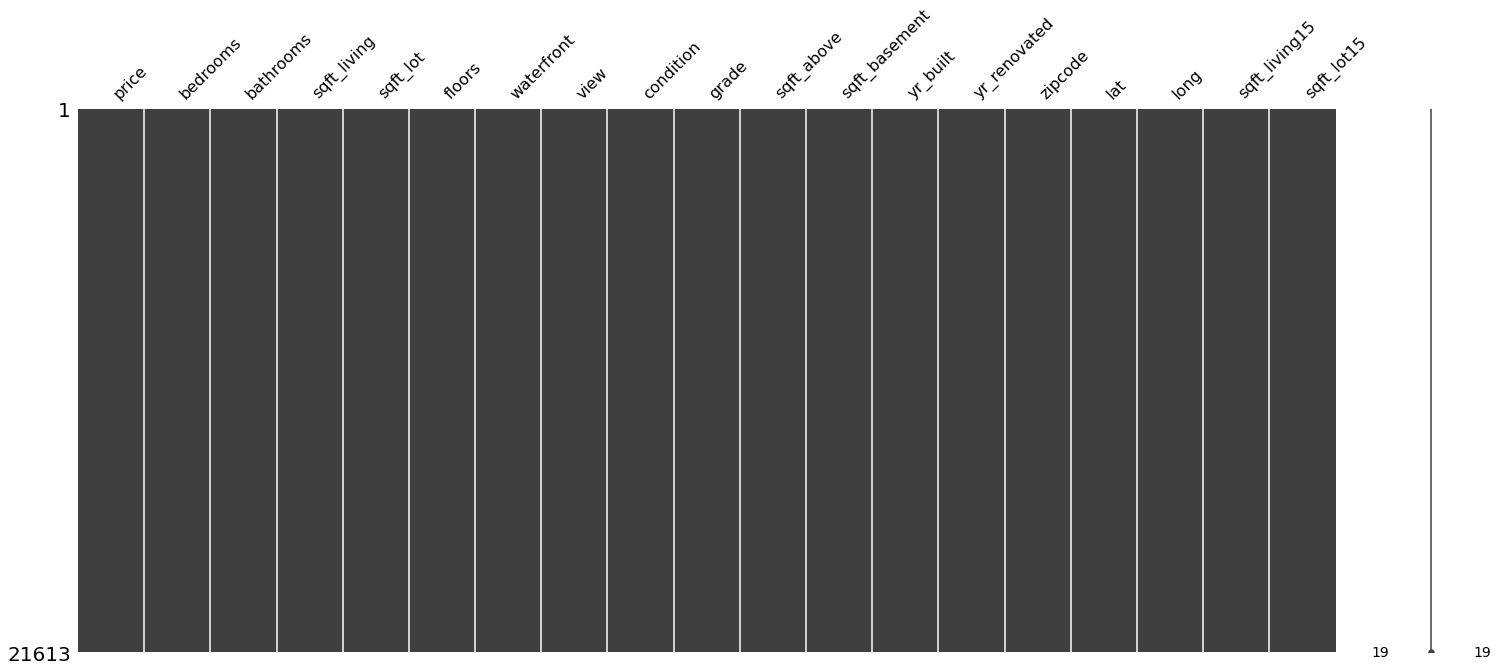

In [39]:
msno.matrix(df)

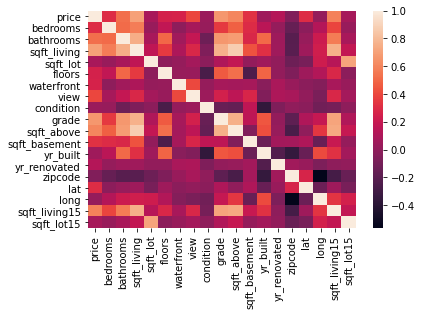

In [40]:
corr=df.corr()
sns.heatmap(corr)


# fig, ax = plt.subplots(figsize=(10,10)) 
# sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)


From the above correlation we find that sqft living, grade and sqft above have more influence on price when compared to others.

In [41]:
features=df.loc[:, df.columns != 'price']
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [49]:
y=df.loc[:,df.columns=='price']

In [50]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


I wanted to explore the relation between bedrooms of the house and price of the house.

In [42]:
df.loc[:,['bedrooms','price']]

,bedrooms,price
0,3,221900.0
1,3,538000.0
2,2,180000.0
3,4,604000.0
4,3,510000.0
...,...,...
21608,3,360000.0
21609,4,400000.0
21610,2,402101.0
21611,3,400000.0


In [43]:
df.groupby('bedrooms').price.median()

bedrooms
0     288000.0
1     299000.0
2     374000.0
3     413000.0
4     549997.5
5     620000.0
6     650000.0
7     728580.0
8     700000.0
9     817000.0
10    660000.0
11    520000.0
33    640000.0
Name: price, dtype: float64

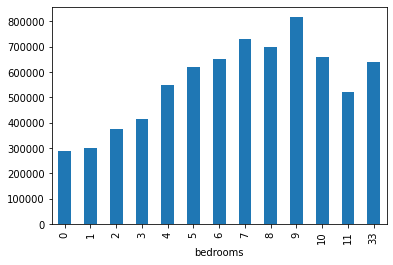

In [44]:
df.groupby('bedrooms').price.median().plot(kind='bar')

In [45]:
# df['price'].plot(kind='line',figsize=(20,20))         

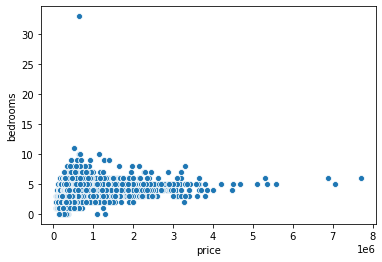

In [46]:
#To understand the pricing range based on the bedrooms
sns.scatterplot(data=df, x="price", y="bedrooms")

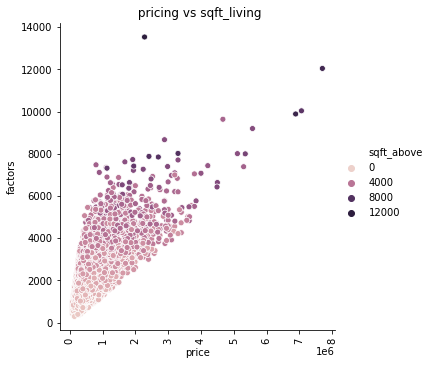

In [47]:
plt.figsize=(20,30)
sns.relplot(x="price", y="sqft_living",hue='sqft_above',data=df)
plt.xlabel('price')
plt.ylabel('factors')
plt.xticks(rotation='vertical')
plt.title(' pricing vs sqft_living')
plt.show()

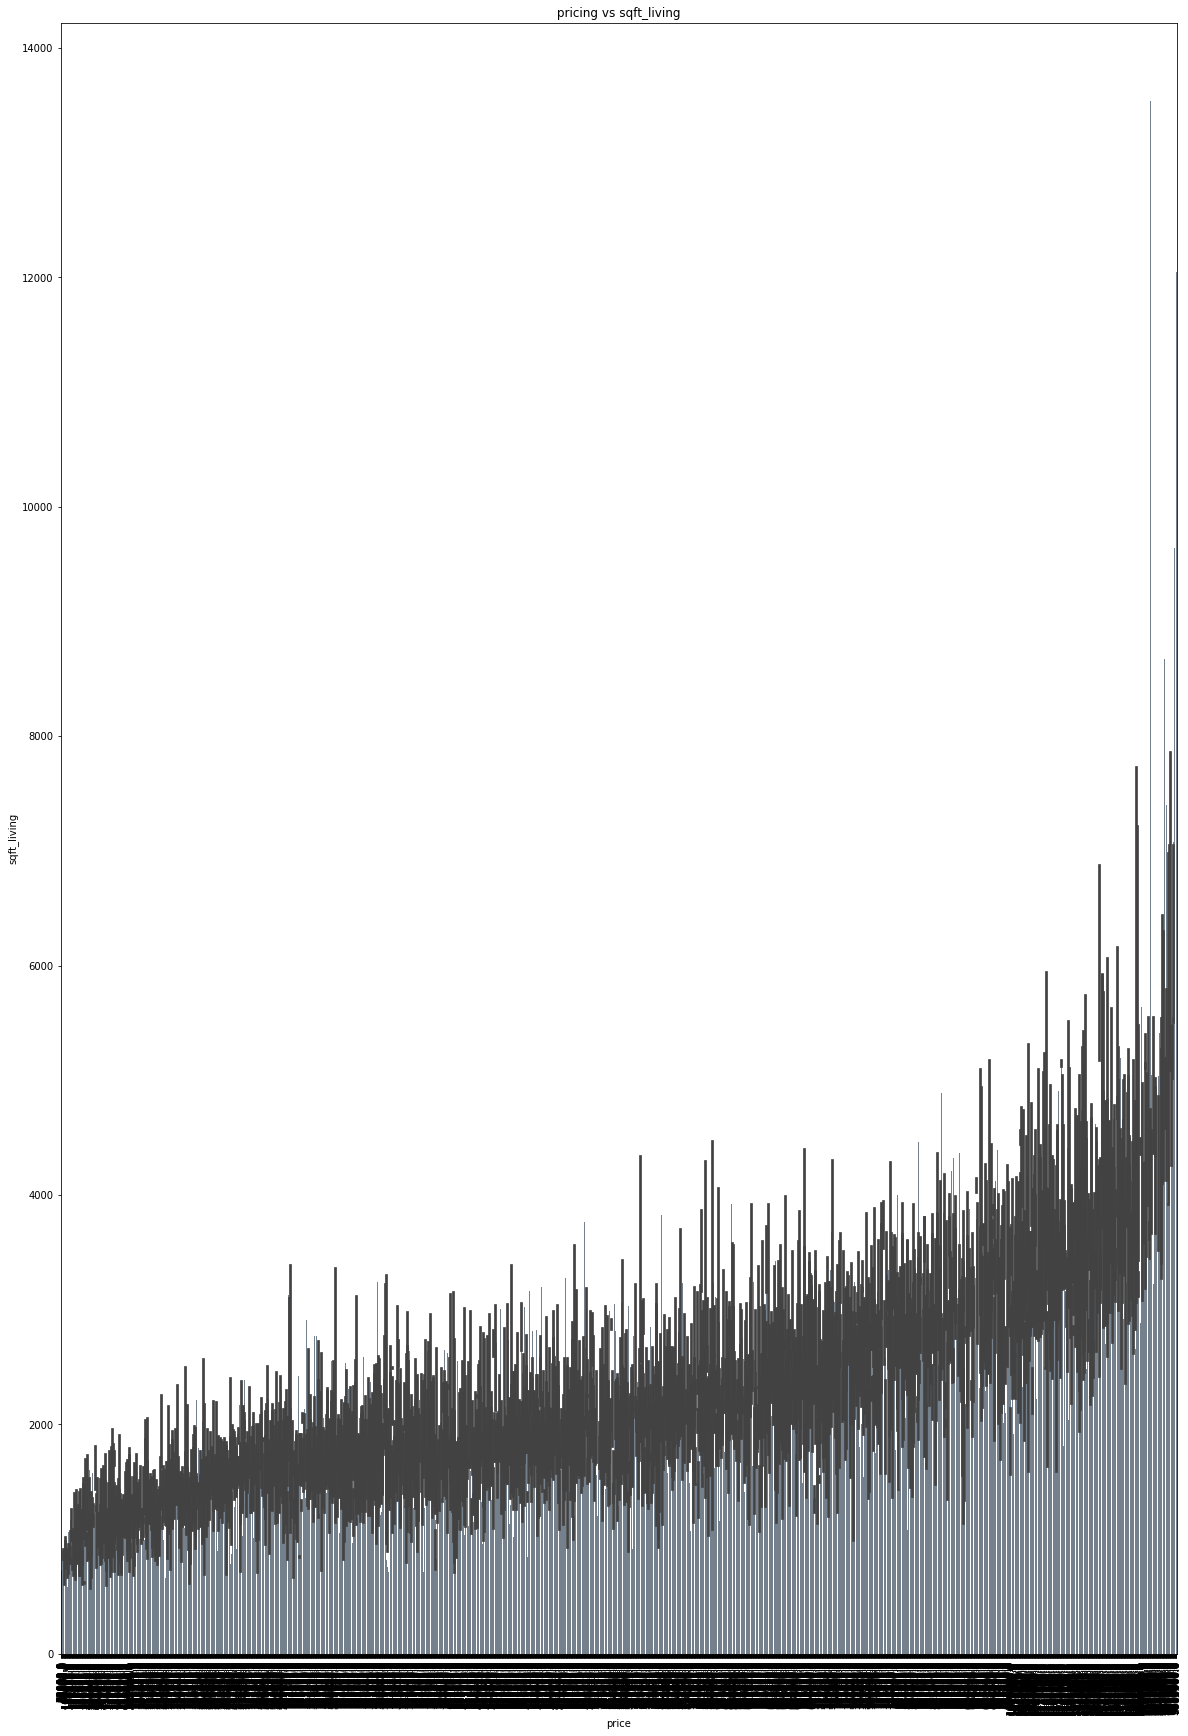

In [48]:
f, ax = plt.subplots(figsize=(20,30))
ax=sns.barplot(x="price", y="sqft_living",color="slategray", data=df)
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.xticks(rotation='vertical')
plt.title(' pricing vs sqft_living ')
plt.show()

## Linear regression model

### 1. we need two variables, predictor and response. 

Simple linear regression
Y=bo+b1x1

In our case we are trying to understand the correlation between the house price and the factors involved.

therefore, we take

y = house price
x = square living

### 2. Splitting the data into two, one training set and another test set

In [97]:
features=df.loc[:, df.columns != 'price']

In [95]:
y=df.loc[:,df.columns=='price']

In [96]:
#x = df.iloc[:,2:].values
#y = df.iloc[:,1].values

In [51]:
# import functionalities from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features,y,test_size = 0.2, random_state = 0)

Training the regression model on training set

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients

In [53]:
#reference:https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
#We can you scikit learn to directly find out the intercept
print(regressor.intercept_)

[4203884.08153487]


In [54]:
#reference:https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
#We can you scikit learn to directly find out the intercept
print(regressor.coef_)

[[-3.46837213e+04  3.93984437e+04  1.05924636e+02  1.75827743e-01
   7.44435143e+03  6.05611232e+05  5.27227676e+04  2.61530811e+04
   9.35877125e+04  7.95171175e+01  4.66068199e+01 -2.60788320e+03
   2.00819947e+01 -5.67867867e+02  6.04913981e+05 -2.22397623e+05
   2.42100883e+01 -4.67569998e-01]]


Predicting the Test set result

In [63]:
y_pred=regressor.predict(x_test)

In [91]:
y_pred

array([[ 378479.59682039],
       [1539776.65574495],
       [ 544557.54194977],
       ...,
       [ 359866.40124741],
       [ 207053.98161522],
       [ 433690.61005221]])